## test running GVAE on the cora dataset

In [5]:
python = "/home/jeremie/miniconda3/envs/gae/bin/python"
! cd vgae && $python train.py --datasrc dgl --dataset cora # from DGL

[22:26:11] /opt/dgl/src/runtime/tensordispatch.cc:43: TensorDispatcher: dlopen failed: /home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/dgl/tensoradapter/pytorch/libtensoradapter_pytorch_1.9.1.so: cannot open shared object file: No such file or directory
Using backend: pytorch
Extracting file to /home/jeremie/.dgl/cora_v2
Finished data loading and preprocessing.
  NumNodes: 2708
  NumEdges: 10556
  NumFeats: 1433
  NumClasses: 7
  NumTrainingSamples: 140
  NumValidationSamples: 500
  NumTestSamples: 1000
Done saving data into cached files.
Total Parameters: 46944
Epoch: 0001 train_loss= 1.76789 train_acc= 0.49980 val_roc= 0.52840 val_ap= 0.51395 time= 0.29602
Epoch: 0002 train_loss= 1.69110 train_acc= 0.49904 val_roc= 0.51230 val_ap= 0.49975 time= 0.24249
Epoch: 0003 train_loss= 1.64070 train_acc= 0.49810 val_roc= 0.50972 val_ap= 0.50664 time= 0.19564
Epoch: 0004 train_loss= 1.50254 train_acc= 0.49730 val_roc= 0.49659 val_ap= 0.52559 time= 0.20460
Epoch: 0005 train_loss= 1

Epoch: 0078 train_loss= 0.61031 train_acc= 0.37636 val_roc= 0.81733 val_ap= 0.82113 time= 0.18910
Epoch: 0079 train_loss= 0.60645 train_acc= 0.37914 val_roc= 0.82071 val_ap= 0.82739 time= 0.19524
Epoch: 0080 train_loss= 0.60374 train_acc= 0.39404 val_roc= 0.81409 val_ap= 0.82148 time= 0.17228
Epoch: 0081 train_loss= 0.60029 train_acc= 0.40424 val_roc= 0.82173 val_ap= 0.82479 time= 0.21642
Epoch: 0082 train_loss= 0.59704 train_acc= 0.42399 val_roc= 0.81857 val_ap= 0.82248 time= 0.19487
Epoch: 0083 train_loss= 0.59455 train_acc= 0.42324 val_roc= 0.81708 val_ap= 0.82162 time= 0.18600
Epoch: 0084 train_loss= 0.59292 train_acc= 0.43047 val_roc= 0.81788 val_ap= 0.82138 time= 0.17112
Epoch: 0085 train_loss= 0.59342 train_acc= 0.44450 val_roc= 0.81343 val_ap= 0.81727 time= 0.18161
Epoch: 0086 train_loss= 0.59265 train_acc= 0.43675 val_roc= 0.81279 val_ap= 0.81954 time= 0.17692
Epoch: 0087 train_loss= 0.59160 train_acc= 0.44356 val_roc= 0.82269 val_ap= 0.82432 time= 0.18474
Epoch: 0088 train_lo

Epoch: 0162 train_loss= 0.51414 train_acc= 0.50081 val_roc= 0.89737 val_ap= 0.89366 time= 0.18473
Epoch: 0163 train_loss= 0.51386 train_acc= 0.49978 val_roc= 0.89807 val_ap= 0.89245 time= 0.17529
Epoch: 0164 train_loss= 0.51365 train_acc= 0.49690 val_roc= 0.90275 val_ap= 0.89766 time= 0.18004
Epoch: 0165 train_loss= 0.51404 train_acc= 0.49819 val_roc= 0.90040 val_ap= 0.89879 time= 0.20815
Epoch: 0166 train_loss= 0.51293 train_acc= 0.50002 val_roc= 0.89906 val_ap= 0.89766 time= 0.16791
Epoch: 0167 train_loss= 0.51290 train_acc= 0.49871 val_roc= 0.90198 val_ap= 0.89781 time= 0.16612
Epoch: 0168 train_loss= 0.51210 train_acc= 0.49766 val_roc= 0.89857 val_ap= 0.89503 time= 0.17205
Epoch: 0169 train_loss= 0.51290 train_acc= 0.49854 val_roc= 0.90083 val_ap= 0.89868 time= 0.17864
Epoch: 0170 train_loss= 0.51146 train_acc= 0.49967 val_roc= 0.89659 val_ap= 0.89454 time= 0.16575
Epoch: 0171 train_loss= 0.51239 train_acc= 0.49957 val_roc= 0.89907 val_ap= 0.89384 time= 0.18828
Epoch: 0172 train_lo

## loading data

In [3]:
from genepy.utils import helper as h

# to comment in your case
from taigapy import TaigaClient
tc = TaigaClient()

from celligner2.dataset import anndata
import pandas as pd
# to comment in your case
from depmapomics import tracker as track
#autoreload
%load_ext autoreload
%autoreload 2
#output
from bokeh.plotting import output_notebook
output_notebook()
from anndata import AnnData

Loading BokehJS ...

In [4]:
# load from taiga public (figshare link)
# load internal expression,
# latest version can be found at https://depmap.org/portal/download/
# can also be loaded like so pd.read_csv('gs://ccle_default_params/celligner_ex/CCLE_expression.csv.gz', index_col=0)
CCLE_expression = tc.get(name='internal-21q3-fe4c',
                         file='CCLE_expression_full')  


# load  TCGA expression
# this dataset was generated from  ,using this script: 
# caan be found here: pd.read_csv('gs://ccle_default_params/celligner_ex/TCGA_expression.csv.gz', index_col=0)
TCGA_expression = tc.get(name='celligner-input-9827',
                       file='tumor_expression')

No dataset version provided. Using version 16.
No dataset version provided. Using version 1.


In [5]:
# loading annotations
CCLE_annotation = track.getTracker() # the function uses pygsheets to load this: REFSHEET_URL=https://docs.google.com/spreadsheets/d/1Pgb5fIClGnErEqzxpU7qqX6ULpGTDjvzWwDN8XUJKIY
# Sheets.from_files(MY_ID, MYSTORAGE_ID).get(REFSHEET_URL).sheets[0].to_frame(index_col=0)
# you can also get it from pd.read_csv('gs://ccle_default_params/celligner_ex/CCLE_annotation.csv.gz', index_col=0)


# can be loaded from 
# pd.read_csv('gs://ccle_default_params/celligner_ex/TCGA_annotation.csv.gz', index_col=0)
TCGA_annotation = tc.get(name='celligner-input-9827',
                         file='tumor_annotations') # generated manually 

No dataset version provided. Using version 1.


In [21]:
# subset gene names to ensembl ids only
CCLE_expression = CCLE_expression[CCLE_expression.columns[:-92]]
CCLE_expression.columns = list(map(lambda x: x.split(
    ' (')[1][:-1] if ' (' in x else x, CCLE_expression.columns))

common = set(CCLE_expression.columns).intersection(
    set(TCGA_expression.columns))
CCLE_expression = CCLE_expression[list(common)]
TCGA_expression = TCGA_expression[list(common)]

In [6]:
# transforming annotations
CCLE_annotation = CCLE_annotation.drop_duplicates('arxspan_id').set_index("arxspan_id")
CCLE_annotation = CCLE_annotation.loc[CCLE_expression.index, ["origin", 'subtype']].rename(columns={"origin": "tissue_type", "subtype": 'disease_type'})
CCLE_annotation["cell_type"] = "cancer cell line"

TCGA_annotation = TCGA_annotation.set_index("sampleID").loc[TCGA_expression.index,["lineage",
"subtype"]].rename(columns={"lineage":"tissue_type", "subtype": 'disease_type'})
TCGA_annotation['cell_type'] = "tumor sample"

In [7]:
# some name are not consistent between the two datasets
rename = {np.nan: "unknown", "adrenal_cortex": "adrenal", "colorectal": "colon", 'thymus': 'thyroid',}
CCLE_annotation = CCLE_annotation.replace({"tissue_type": rename})
TCGA_annotation = TCGA_annotation.replace({"tissue_type": rename})

In [144]:
mostvar = set(CCLE_expression.var(0).sort_values()[-4000:].index) & set(TCGA_expression.var(0).sort_values()[-4000:].index)

In [146]:
ccle = AnnData(CCLE_expression[mostvar], CCLE_annotation)
tcga = AnnData(TCGA_expression[mostvar], TCGA_annotation)

## test running scArches TRVAE on CCLE + TCGA

In [10]:
import scanpy as sc
import torch
import matplotlib.pyplot as plt
import numpy as np
import gdown

In [59]:
import celligner2

In [11]:
sc.settings.set_figure_params(dpi=200, frameon=False)
sc.set_figure_params(dpi=200)
sc.set_figure_params(figsize=(4, 4))
torch.set_printoptions(precision=3, sci_mode=False, edgeitems=7)

In [106]:
tcga

AnnData object with n_obs × n_vars = 12236 × 1179
    obs: 'tissue_type', 'disease_type', 'cell_type'

In [79]:
condition_key = 'cell_type'
cell_type_key = 'tissue_type'
target_conditions = ['cancer cell line']
source_conditions = ['tumor sample']

trvae_epochs = 500
surgery_epochs = 500

early_stopping_kwargs = {
    "early_stopping_metric": "val_unweighted_loss",
    "threshold": 0,
    "patience": 20,
    "reduce_lr": True,
    "lr_patience": 13,
    "lr_factor": 0.1,
}

In [147]:
trvae = celligner2.TRVAE(
    adata=tcga,
    condition_key=condition_key,
    conditions=source_conditions,
    hidden_layer_sizes=[128, 128],
)


INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 2720 128 1
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 1
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 2720 



In [148]:
trvae.train(
    n_epochs=trvae_epochs,
    alpha_epoch_anneal=200,
    early_stopping_kwargs=early_stopping_kwargs
)

 |████----------------| 22.4%  - val_loss: 4394.1480957031 - val_recon_loss: 4379.7320800781 - val_kl_loss: 25.9748559952 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |█████---------------| 25.6%  - val_loss: 4384.4658691406 - val_recon_loss: 4368.5467285156 - val_kl_loss: 25.0694532394 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |█████---------------| 28.2%  - val_loss: 4374.5905761719 - val_recon_loss: 4357.2689941406 - val_kl_loss: 24.7450860977 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |██████--------------| 33.6%  - val_loss: 4381.3524902344 - val_recon_loss: 4360.9467285156 - val_kl_loss: 24.4379552841 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |███████-------------| 36.2%  - val_loss: 4383.7145507813 - val_recon_loss: 4361.7503906250 - val_kl_loss: 24.4046209335 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |███████-------------| 38.8%  - val_loss: 4385.2873535156 - val_recon_loss: 4361.7284667969 - val_kl_loss: 24.4133157730 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████████------------

In [149]:
adata_latent = sc.AnnData(trvae.get_latent())
adata_latent.obs['cell_type'] = tcga.obs[cell_type_key].tolist()
adata_latent.obs['batch'] = tcga.obs[condition_key].tolist()

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


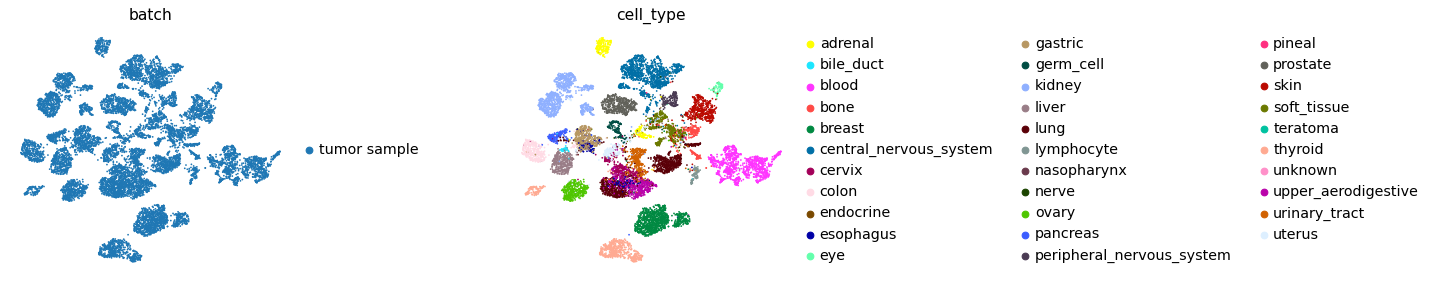

In [150]:
sc.pp.neighbors(adata_latent, n_neighbors=8)
sc.tl.leiden(adata_latent)
sc.tl.umap(adata_latent)
sc.pl.umap(adata_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           )

In [157]:
ref_path = 'reference_model/'
trvae.save(ref_path, overwrite=True)

In [151]:
new_trvae = celligner2.TRVAE(
    adata=ccle,
    condition_key=condition_key,
    conditions=target_conditions,
    hidden_layer_sizes=[128, 128],
)



INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 2720 128 1
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 1
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 2720 



In [152]:
new_trvae.train(
    n_epochs=surgery_epochs,
    alpha_epoch_anneal=200,
    early_stopping_kwargs=early_stopping_kwargs,
    weight_decay=0
)

 |██------------------| 14.6%  - val_loss: 4694.9570312500 - val_recon_loss: 4686.0581054688 - val_kl_loss: 24.7190322876 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |███-----------------| 19.6%  - val_loss: 4588.6416015625 - val_recon_loss: 4577.4401855469 - val_kl_loss: 23.0959501266 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████----------------| 22.2%  - val_loss: 4658.0632324219 - val_recon_loss: 4645.5092773438 - val_kl_loss: 22.8251762390 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████----------------| 24.8%  - val_loss: 4740.1599121094 - val_recon_loss: 4725.8769531250 - val_kl_loss: 23.2242164612 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |█████---------------| 27.0%  - val_loss: 4601.6296386719 - val_recon_loss: 4586.2897949219 - val_kl_loss: 22.8952026367 - val_mmd_loss: 0.0000000000
Stopping early: no improvement of more than 0 nats in 50 epochs
If the early stopping criterion is too strong, please instantiate it with different parameters in the train method.
Saving best state

In [153]:
adata_latent = AnnData(new_trvae.get_latent())
adata_latent.obs['cell_type'] = ccle.obs[cell_type_key].tolist()
adata_latent.obs['batch'] = ccle.obs[condition_key].tolist()

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


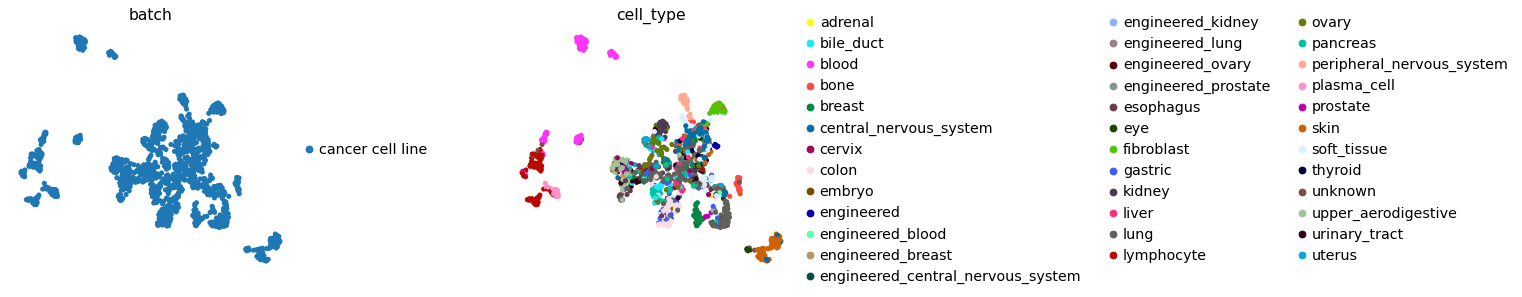

In [154]:
sc.pp.neighbors(adata_latent, n_neighbors=8)
sc.tl.leiden(adata_latent)
sc.tl.umap(adata_latent)
sc.pl.umap(adata_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           )

In [158]:
new_trvae = celligner2.TRVAE.load_query_data(adata=ccle, reference_model=ref_path)

AnnData object with n_obs × n_vars = 1411 × 2720
    obs: 'tissue_type', 'disease_type', 'cell_type', 'trvae_size_factors', 'trvae_labeled'

INITIALIZING NEW NETWORK..............
Encoder Architecture:
	Input Layer in, out and cond: 2720 128 2
	Hidden Layer 1 in/out: 128 128
	Mean/Var Layer in/out: 128 10
Decoder Architecture:
	First Layer in, out and cond:  10 128 2
	Hidden Layer 1 in/out: 128 128
	Output Layer in/out:  128 2720 



In [159]:
new_trvae.train(
    n_epochs=surgery_epochs,
    alpha_epoch_anneal=200,
    early_stopping_kwargs=early_stopping_kwargs,
    weight_decay=0
)

 |███-----------------| 18.0%  - val_loss: 4944.6943359375 - val_recon_loss: 4933.3481445312 - val_kl_loss: 25.4971389771 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████----------------| 20.6%  - val_loss: 4832.8496093750 - val_recon_loss: 4819.8151855469 - val_kl_loss: 25.5580272675 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |████----------------| 23.2%  - val_loss: 4731.2172851562 - val_recon_loss: 4716.3703613281 - val_kl_loss: 25.8205556870 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |█████---------------| 26.6%  - val_loss: 4871.2087402344 - val_recon_loss: 4854.1933593750 - val_kl_loss: 25.7809677124 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |█████---------------| 29.2%  - val_loss: 4906.3474121094 - val_recon_loss: 4887.8466796875 - val_kl_loss: 25.5185089111 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |██████--------------| 31.8%  - val_loss: 4931.0541992188 - val_recon_loss: 4911.0637207031 - val_kl_loss: 25.3044967651 - val_mmd_loss: 0.0000000000
ADJUSTED LR
 |██████--------------

ACH-001113         cancer cell line
ACH-001289         cancer cell line
ACH-001339         cancer cell line
ACH-001538         cancer cell line
ACH-000242         cancer cell line
                         ...       
TCGA-95-7947-01        tumor sample
TCGA-VQ-AA6F-01        tumor sample
TCGA-BR-8588-01        tumor sample
TCGA-24-2254-01        tumor sample
TCGA-DD-A115-01        tumor sample
Name: cell_type, Length: 13647, dtype: object

In [170]:
full_latent = sc.AnnData(new_trvae.get_latent(np.vstack([ccle.X,tcga.X]), pd.concat([ccle.obs[condition_key], tcga.obs[condition_key]])))
full_latent.obs['cell_type'] = ccle.obs[cell_type_key].tolist() + tcga.obs[cell_type_key].tolist()
full_latent.obs['batch'] = ccle.obs[condition_key].tolist() + tcga.obs[condition_key].tolist()

/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cell_type' as categorical
/home/jeremie/miniconda3/envs/gae/lib/python3.8/site-packages/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'batch' as categorical


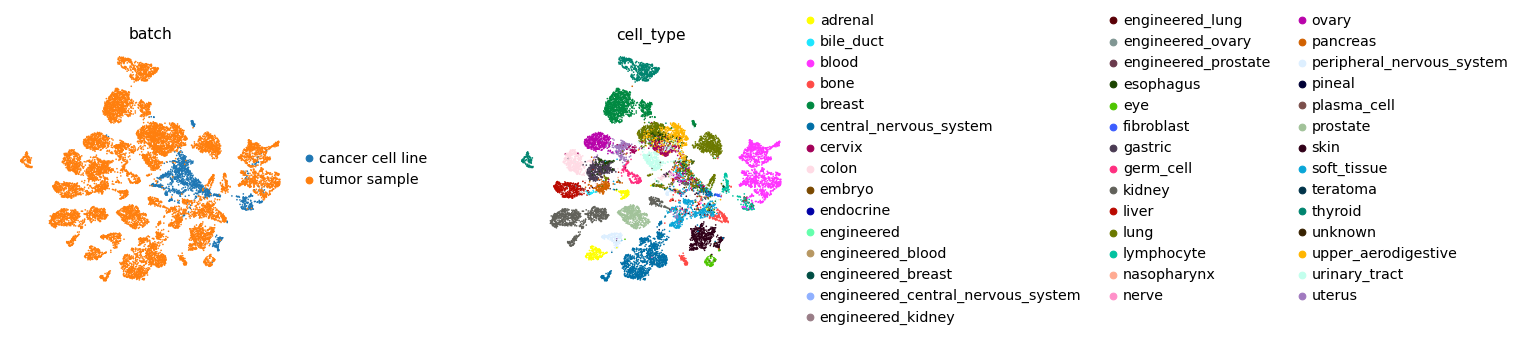

In [171]:
sc.pp.neighbors(full_latent, n_neighbors=8)
sc.tl.leiden(full_latent)
sc.tl.umap(full_latent)
sc.pl.umap(full_latent,
           color=['batch', 'cell_type'],
           frameon=False,
           wspace=0.6,
           )

In [ ]:
## add many many more datasets